In [1]:
import pandas as pd
import numpy as np

In [4]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D,Flatten,Dropout, BatchNormalization

In [3]:
#generator

train_ds= keras.utils.image_dataset_from_directory(
    directory='./data/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

test_ds= keras.utils.image_dataset_from_directory(
    directory='./data/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.


2025-01-25 23:13:13.921626: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


Found 5000 files belonging to 2 classes.


In [4]:
type(train_ds)

tensorflow.python.data.ops.prefetch_op._PrefetchDataset

In [5]:
test_ds

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

## Normalize

In [6]:
def process(image,label):
    image = tf.cast(image/255.0, tf.float32)
    return image,label

train_ds = train_ds.map(process)
test_ds = test_ds.map(process)


In [7]:
# Create CNN Model
model = Sequential()

model.add(Conv2D(32, kernel_size=(3,2), padding='valid', activation='relu', input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))


model.add(Conv2D(64, kernel_size=(3,2), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(128, kernel_size=(3,2), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))


/home/cypher/Desktop/vscode/ML/.venv/lib64/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 255, 32)   │           608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 254, 255, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 126, 64)   │        12,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 125, 126, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 63, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 62, 128)    │        49,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 60, 62, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 31, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 119040)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    15,237,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,308,705 (58.40 MB)

 Trainable params: 15,308,257 (58.40 MB)

 Non-trainable params: 448 (1.75 KB)

In [9]:
model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'], jit_compile=False)

In [108]:
history = model.fit(train_ds, epochs=10, validation_data=test_ds)

Epoch 1/10


2025-01-25 21:12:55.769182: W external/local_xla/xla/tsl/framework/bfc_allocator.cc:497] Allocator (GPU_0_bfc) ran out of memory trying to allocate 123.05MiB (rounded to 129024000)requested by op StatefulPartitionedCall/gradient_tape/sequential_3_1/batch_normalization_10_1/moments/sub
If the cause is memory fragmentation maybe the environment variable 'TF_GPU_ALLOCATOR=cuda_malloc_async' will improve the situation. 
Current allocation summary follows.
Current allocation summary follows.
2025-01-25 21:12:55.769419: I external/local_xla/xla/tsl/framework/bfc_allocator.cc:1053] BFCAllocator dump for GPU_0_bfc
2025-01-25 21:12:55.769436: I external/local_xla/xla/tsl/framework/bfc_allocator.cc:1060] Bin (256): 	Total Chunks: 12815, Chunks in use: 12811. 3.13MiB allocated for chunks. 3.13MiB in use in bin. 72.2KiB client-requested in use in bin.
2025-01-25 21:12:55.769444: I external/local_xla/xla/tsl/framework/bfc_allocator.cc:1060] Bin (512): 	Total Chunks: 61, Chunks in use: 56. 31.0KiB a

ResourceExhaustedError: Graph execution error:

Detected at node gradient_tape/sequential_3_1/batch_normalization_10_1/moments/sub defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "/home/cypher/Desktop/vscode/ML/.venv/lib64/python3.11/site-packages/ipykernel_launcher.py", line 18, in <module>

  File "/home/cypher/Desktop/vscode/ML/.venv/lib64/python3.11/site-packages/traitlets/config/application.py", line 1075, in launch_instance

  File "/home/cypher/Desktop/vscode/ML/.venv/lib64/python3.11/site-packages/ipykernel/kernelapp.py", line 739, in start

  File "/home/cypher/Desktop/vscode/ML/.venv/lib64/python3.11/site-packages/tornado/platform/asyncio.py", line 205, in start

  File "/usr/lib64/python3.11/asyncio/base_events.py", line 608, in run_forever

  File "/usr/lib64/python3.11/asyncio/base_events.py", line 1936, in _run_once

  File "/usr/lib64/python3.11/asyncio/events.py", line 84, in _run

  File "/home/cypher/Desktop/vscode/ML/.venv/lib64/python3.11/site-packages/ipykernel/kernelbase.py", line 545, in dispatch_queue

  File "/home/cypher/Desktop/vscode/ML/.venv/lib64/python3.11/site-packages/ipykernel/kernelbase.py", line 534, in process_one

  File "/home/cypher/Desktop/vscode/ML/.venv/lib64/python3.11/site-packages/ipykernel/kernelbase.py", line 437, in dispatch_shell

  File "/home/cypher/Desktop/vscode/ML/.venv/lib64/python3.11/site-packages/ipykernel/ipkernel.py", line 362, in execute_request

  File "/home/cypher/Desktop/vscode/ML/.venv/lib64/python3.11/site-packages/ipykernel/kernelbase.py", line 778, in execute_request

  File "/home/cypher/Desktop/vscode/ML/.venv/lib64/python3.11/site-packages/ipykernel/ipkernel.py", line 449, in do_execute

  File "/home/cypher/Desktop/vscode/ML/.venv/lib64/python3.11/site-packages/ipykernel/zmqshell.py", line 549, in run_cell

  File "/home/cypher/Desktop/vscode/ML/.venv/lib64/python3.11/site-packages/IPython/core/interactiveshell.py", line 3075, in run_cell

  File "/home/cypher/Desktop/vscode/ML/.venv/lib64/python3.11/site-packages/IPython/core/interactiveshell.py", line 3130, in _run_cell

  File "/home/cypher/Desktop/vscode/ML/.venv/lib64/python3.11/site-packages/IPython/core/async_helpers.py", line 128, in _pseudo_sync_runner

  File "/home/cypher/Desktop/vscode/ML/.venv/lib64/python3.11/site-packages/IPython/core/interactiveshell.py", line 3334, in run_cell_async

  File "/home/cypher/Desktop/vscode/ML/.venv/lib64/python3.11/site-packages/IPython/core/interactiveshell.py", line 3517, in run_ast_nodes

  File "/home/cypher/Desktop/vscode/ML/.venv/lib64/python3.11/site-packages/IPython/core/interactiveshell.py", line 3577, in run_code

  File "/tmp/ipykernel_56162/596209571.py", line 1, in <module>

  File "/home/cypher/Desktop/vscode/ML/.venv/lib64/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/home/cypher/Desktop/vscode/ML/.venv/lib64/python3.11/site-packages/keras/src/backend/tensorflow/trainer.py", line 371, in fit

  File "/home/cypher/Desktop/vscode/ML/.venv/lib64/python3.11/site-packages/keras/src/backend/tensorflow/trainer.py", line 219, in function

  File "/home/cypher/Desktop/vscode/ML/.venv/lib64/python3.11/site-packages/keras/src/backend/tensorflow/trainer.py", line 132, in multi_step_on_iterator

  File "/home/cypher/Desktop/vscode/ML/.venv/lib64/python3.11/site-packages/keras/src/backend/tensorflow/trainer.py", line 113, in one_step_on_data

  File "/home/cypher/Desktop/vscode/ML/.venv/lib64/python3.11/site-packages/keras/src/backend/tensorflow/trainer.py", line 77, in train_step

failed to allocate memory
	 [[{{node gradient_tape/sequential_3_1/batch_normalization_10_1/moments/sub}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_multi_step_on_iterator_123563]

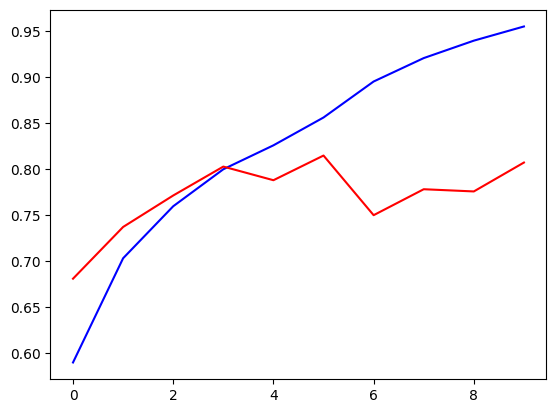

In [16]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='blue')
plt.plot(history.history['val_accuracy'],color='red')

In [76]:
import cv2

In [77]:
testimg = cv2.imread('./data/cat.jpg')

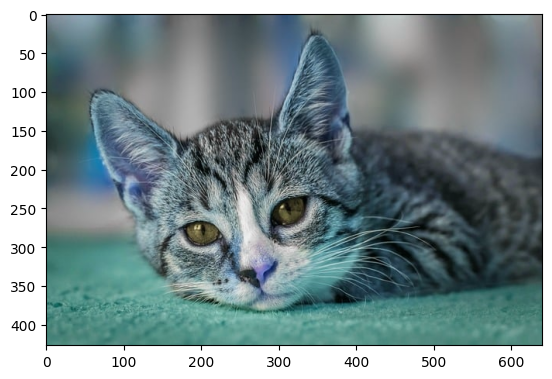

In [78]:
plt.imshow(testimg)

In [79]:
testimg.shape

(427, 640, 3)

In [80]:
testimg = cv2.resize(testimg, (256,256))

In [81]:
testinput = testimg.reshape((1,256,256,3))

In [ ]:
model.predict(testinput)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


array([[1.]], dtype=float32)

In [7]:
from keras.preprocessing import image


In [8]:
from keras.preprocessing.image import ImageDataGenerator

ImportError: cannot import name 'ImageDataGenerator' from 'keras.preprocessing.image' (/home/cypher/Desktop/vscode/ML/.venv/lib64/python3.11/site-packages/keras/api/preprocessing/image/__init__.py)

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [10]:
img = image.load_img('./augumenteddata/istockphoto-1325727757-612x612.jpg', target_size=(256,256))

In [11]:
type(img)

PIL.Image.Image

In [19]:
from textwrap import fill
from tkinter import HORIZONTAL
from turtle import width


datagen = ImageDataGenerator(
    rotation_range=40,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.2,
    height_shift_range=0.2,
    fill_mode='nearest'
)


In [20]:
img = image.img_to_array(img)


In [21]:
img.shape

(256, 256, 3)

In [22]:
import matplotlib.pyplot as plt

In [23]:
input = img.reshape((1,256,256,3))

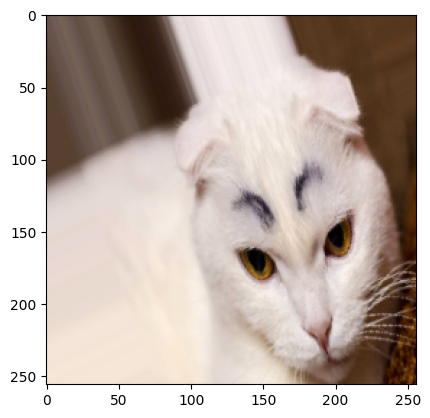

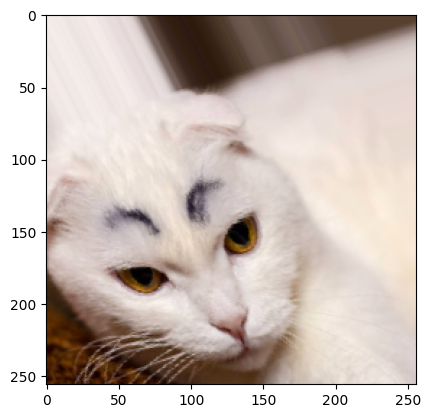

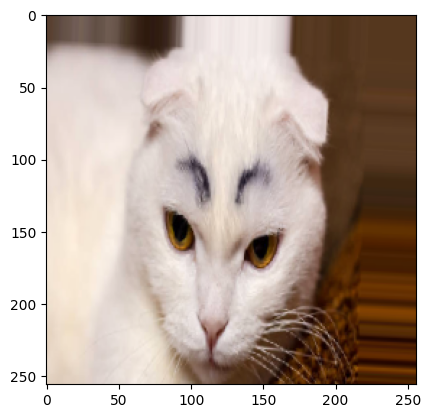

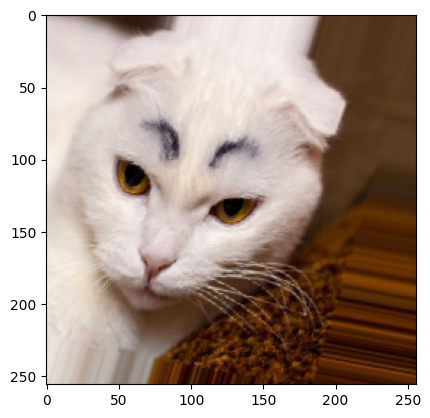

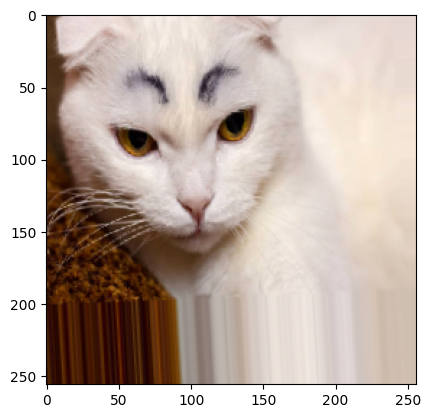

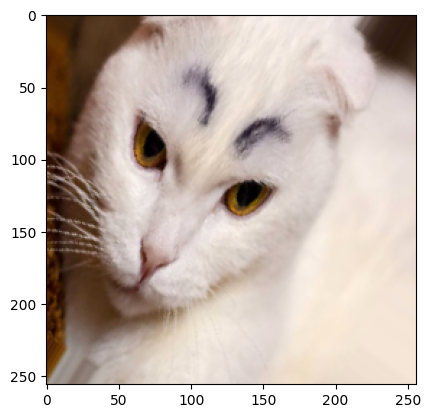

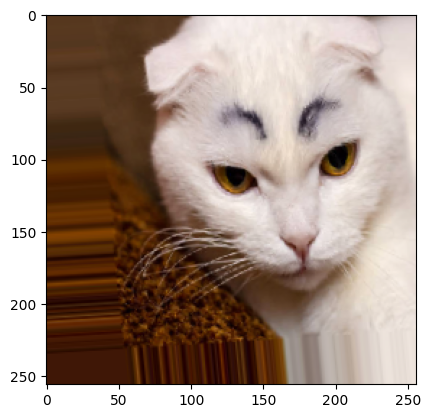

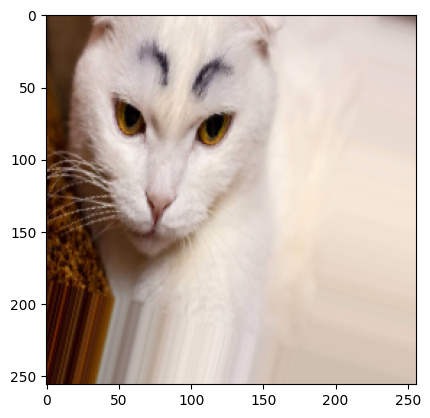

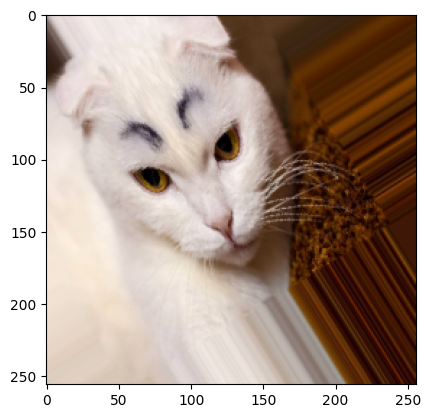

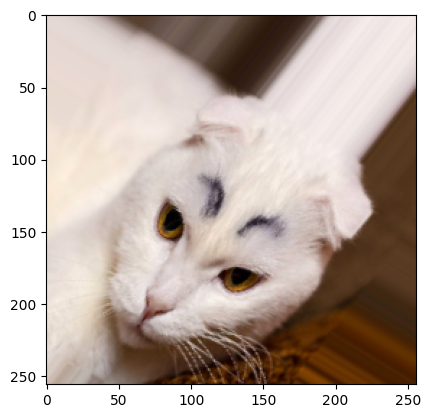

In [24]:
i=0

for output in datagen.flow(input, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(output[0]))
    i += 1
    if i == 10:
        break
